In [7]:
!pip install numpy pandas matplotlib seaborn scikit-learn plotly umap-learn


In [2]:
!C:\Users\m19er\AppData\Local\Programs\Python\Python313\python.exe -m pip install \
   unimol_tools huggingface_hub

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ------------- -------------------------- 1.8/5.5 MB 11.4 MB/s eta 0:00:01
   -------------------------------- ------- 4.5/5.5 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 10.4 MB/s  0:00:00
   ---------------------------------------- 0.0/4.6 MB ? eta -:--:--
   -------------------- ------------------- 2.4/4.6 MB 11.8 MB/s eta 0:00:01
   -------------------------------------- - 4.5/4.6 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 4.6/4.6 MB 10.9 MB/s  0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# Basic packages
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML & preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Dimensionality reduction
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

# Custom functions
from data_processing_functions import canonicalize_smiles_column, process_binding_constants, extract_target_name_from_description, resolve_smiles_by_name, clean_and_validate_sequences, resolve_smiles_by_name_or_pubchem_id, merge_inter_apt_exp, extract_clean_target_name
from data_processing_functions import COLUMNS_LIST as columns_list


# Visualization setup
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## RSAPred

In [9]:
df_1 = pd.read_csv('rsapred.csv', sep = '\t')
df_1

,Entry_ID,SMILES,Target_RNA_sequence,Molecule_name,Molecule_ID,Target_RNA_name,Target_RNA_ID,pKd
0,39,C1=CC=C2C(=C1)C(=O)C3=C(C2=O)C(=C(C=C3NC4=CC(=...,GGGAGAATTCCCGCGGCAGAAGCCCACCTGGCTTTGAACTCTATGT...,Cibacron blue,Target_lig_27,RNA_APTAMER_CB_42,Target_4,4.000000
1,40,C1=CC=C2C(=C1)C(=O)C3=C(C2=O)C(=C(C=C3NC4=CC(=...,GGGAGAAUUCCCGCGGCGUUGGCCCAGGAUAAUAGGACGAAAUCCG...,Reactive Blue 4,Target_lig_28,RNA_APTAMER_B4_25,Target_5,3.221849
2,91,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,GGGAAGGGAAGAAACUGCGGCUUCGGCCGGCUUCCC,ATP,Target_lig_65,RNA_Aptamer,Target_6,5.397940
3,92,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)O)O...,GGGAAGGGAAGAAACUGCGGCUUCGGCCGGCUUCCC,AMP,Target_lig_66,RNA_Aptamer,Target_6,8.301026
4,93,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)CC(C(C(...,GGCGUGUAGGAUAUGCUUCGGCAGAAGGACACGCC,FAD,Target_lig_67,35 nucleotide RNA,Target_26,4.638272
...,...,...,...,...,...,...,...,...
515,2497,O=C(Cc1ccccc1)OC[C@H]1OC(=O)NC1CN1CCN(CC1)c1cc...,GAGGGUGGAACCGCGCUUCGGCGUCCCUC,"Compound (4R,5S)-1",Target_lig_1239,Antiterminator model RNA AM1A,Target_147,4.920819
516,2498,O=C(Cc1ccccc1)OCC1OC(=O)N[C@H]1CN1CCN(CC1)c1cc...,GAGGGUGGAACCGCGCUUCGGCGUCCCUC,"Compound (4S,5R)-1",Target_lig_1240,Antiterminator model RNA AM1A,Target_147,4.795880
517,2499,O=C(Nc1ccc(cc1)C(=O)C)OC[C@H]1OC(=O)NC1CN1CCN(...,GAGGGUGGAACCGCGCUUCGGCGUCCCUC,"Compound (4R,5S)-2",Target_lig_1241,Antiterminator model RNA AM1A,Target_147,5.522879
518,2500,O=C(Nc1ccc(cc1)C(=O)C)OCC1OC(=O)N[C@H]1CN1CCN(...,GAGGGUGGAACCGCGCUUCGGCGUCCCUC,"Compound (4S,5R)-2",Target_lig_1242,Antiterminator model RNA AM1A,Target_147,5.795880


In [10]:
df_1 = canonicalize_smiles_column(df_1, 'SMILES', 'canonical_smiles')
df_1 = clean_and_validate_sequences(df_1, seq_col='Target_RNA_sequence')
df_1 = process_binding_constants(df_1, column='pKd', unit='pKd')
df_1['buffer'] = np.nan
df_1['origin'] = np.nan
df_1['source'] = 'RSAPred'
df_1 = df_1.dropna(subset=['canonical_smiles', 'sequence', 'type', 'label'])
df_1_cleaned = df_1[columns_list].drop_duplicates()
df_1_cleaned

[12:16:12] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:16:12] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:16:12] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:16:12] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:16:12] non-ring atom 1 marked aromatic
[12:16:12] non-ring atom 1 marked aromatic


,type,sequence,canonical_smiles,pKd_value,label,buffer,origin,source
0,DNA,GGGAGAATTCCCGCGGCAGAAGCCCACCTGGCTTTGAACTCTATGT...,Nc1c(S(=O)(=O)O)cc(Nc2ccc(Nc3nc(Cl)nc(Nc4ccccc...,4.000000,0,NaN,NaN,RSAPred
1,RNA,GGGAGAAUUCCCGCGGCGUUGGCCCAGGAUAAUAGGACGAAAUCCG...,Nc1c(S(=O)(=O)O)cc(Nc2ccc(S(=O)(=O)O)c(Nc3nc(C...,3.221849,0,NaN,NaN,RSAPred
2,RNA,GGGAAGGGAAGAAACUGCGGCUUCGGCCGGCUUCCC,Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O...,5.397940,1,NaN,NaN,RSAPred
3,RNA,GGGAAGGGAAGAAACUGCGGCUUCGGCCGGCUUCCC,Nc1ncnc2c1ncn2C1OC(COP(=O)(O)O)C(O)C1O,8.301026,1,NaN,NaN,RSAPred
4,RNA,GGCGUGUAGGAUAUGCUUCGGCAGAAGGACACGCC,Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(CC(O)C(O)C(O)COP(...,4.638272,1,NaN,NaN,RSAPred
...,...,...,...,...,...,...,...,...
515,RNA,GAGGGUGGAACCGCGCUUCGGCGUCCCUC,O=C(Cc1ccccc1)OC[C@H]1OC(=O)NC1CN1CCN(c2ccccc2...,4.920819,1,NaN,NaN,RSAPred
516,RNA,GAGGGUGGAACCGCGCUUCGGCGUCCCUC,O=C(Cc1ccccc1)OCC1OC(=O)N[C@H]1CN1CCN(c2ccccc2...,4.795880,1,NaN,NaN,RSAPred
517,RNA,GAGGGUGGAACCGCGCUUCGGCGUCCCUC,CC(=O)c1ccc(NC(=O)OC[C@H]2OC(=O)NC2CN2CCN(c3cc...,5.522879,1,NaN,NaN,RSAPred
518,RNA,GAGGGUGGAACCGCGCUUCGGCGUCCCUC,CC(=O)c1ccc(NC(=O)OCC2OC(=O)N[C@H]2CN2CCN(c3cc...,5.795880,1,NaN,NaN,RSAPred


## Aptamerbase

In [11]:
inter = pd.read_csv('aptamerbase_interactions.csv')
apt = pd.read_csv('aptamerbase_aptamers.csv')
exp = pd.read_csv('aptamerbase_experiments.csv')


In [14]:
df_2_init = merge_inter_apt_exp(inter, apt, exp)
df_2_init = extract_clean_target_name(df_2_init, column='participant_label')
df_2_init = df_2_init[['dissociation_constant_value','sequence', 'pubmed', 'target_name']].dropna(subset=['sequence', 'target_name'])
df_2_init = resolve_smiles_by_name(df_2_init, name_column='target_name')
 

Запрос к PubChem: 100%|██████████| 360/360 [06:53<00:00,  1.15s/it]


In [15]:
df_2_init.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2593 entries, 285 to 4934
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dissociation_constant_value  1537 non-null   float64
 1   sequence                     2593 non-null   object 
 2   pubmed                       2537 non-null   float64
 3   target_name                  2593 non-null   object 
 4   canonical_smiles             467 non-null    object 
 5   found_smiles                 2593 non-null   bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 124.1+ KB


In [16]:
df_2 = canonicalize_smiles_column(df_2_init, 'canonical_smiles', 'canonical_smiles')
df_2 = clean_and_validate_sequences(df_2, seq_col='sequence')
df_2 = process_binding_constants(df_2, column='dissociation_constant_value', unit='Kd')
df_2['buffer'] = np.nan
df_2['origin'] = df_2['pubmed'].apply(lambda x: f'https://pubmed.ncbi.nlm.nih.gov/{str(int(x))}/' if pd.notna(x) else np.nan)
df_2['source'] = 'Aptamer Base'
df_2_cleaned = df_2.dropna(subset=['canonical_smiles', 'sequence', 'type', 'label'])
df_2_cleaned = df_2_cleaned[columns_list].drop_duplicates()
df_2_cleaned

,type,sequence,canonical_smiles,pKd_value,label,buffer,origin,source
285,RNA,UAAAUCGACUUGUCGUAAACCCAUUCUUAUCGGCGUGCUCUACAGCCG,Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OC2C1O,5.00000,1,NaN,https://pubmed.ncbi.nlm.nih.gov/10913311/,Aptamer Base
286,RNA,UAAAACGACUUGUCGCGUGCUGCCCGCCUGUUCGCUUUCUGCACCCC,Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OC2C1O,5.00000,1,NaN,https://pubmed.ncbi.nlm.nih.gov/10913311/,Aptamer Base
287,RNA,CCGACGCGUAAACGAAACGCACAUUCCCCCACAGGAUAUGUGCUCGG,Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OC2C1O,5.00000,1,NaN,https://pubmed.ncbi.nlm.nih.gov/10913311/,Aptamer Base
288,RNA,UAAAUCGACUUGUCGCGUUGCAGGCUGCACCCCGUCCGUGGACCCCC,Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OC2C1O,5.00000,1,NaN,https://pubmed.ncbi.nlm.nih.gov/10913311/,Aptamer Base
1006,RNA,GGGAAUUCCGCGUGUGCGCCGCGGAAGACGUUGGAAGGAUAGAUAC...,NCCc1ccc(O)c(O)c1,5.79588,1,NaN,https://pubmed.ncbi.nlm.nih.gov/9245404/,Aptamer Base
...,...,...,...,...,...,...,...,...
4888,RNA,AAAAUCGCAAUCAACCGUGGCUGGG,C[S+](CCC(N)C(=O)[O-])CC1OC(n2cnc3c(N)ncnc32)C...,NaN,1,NaN,https://pubmed.ncbi.nlm.nih.gov/9115371/,Aptamer Base
4889,RNA,GGGCAUGGUAGAAACUGCGGAUCGA,C[S+](CCC(N)C(=O)[O-])CC1OC(n2cnc3c(N)ncnc32)C...,NaN,1,NaN,https://pubmed.ncbi.nlm.nih.gov/9115371/,Aptamer Base
4890,RNA,GGACGGCACCACGGUCGGAUCCGUGAGUUGUGACAAUUUAGCGGGU...,CCN(CC)c1ccc2c(-c3ccc(S(=O)(=O)O)cc3S(=O)(=O)[...,NaN,1,NaN,https://pubmed.ncbi.nlm.nih.gov/9889155/,Aptamer Base
4892,DNA,GGGCACCGCACTCACACACCACATCAATCCAAGCTCCA,NC(=O)C(N)Cc1ccc(O)cc1,NaN,1,NaN,https://pubmed.ncbi.nlm.nih.gov/11557341/,Aptamer Base


In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2593 entries, 285 to 4934
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dissociation_constant_value  1537 non-null   float64
 1   sequence                     2593 non-null   object 
 2   pubmed                       2537 non-null   float64
 3   target_name                  2593 non-null   object 
 4   canonical_smiles             467 non-null    object 
 5   found_smiles                 2593 non-null   bool   
 6   type                         2578 non-null   object 
 7   is_valid                     2593 non-null   bool   
 8   Kd_molar                     1537 non-null   float64
 9   pKd_value                    1359 non-null   float64
 10  label                        2593 non-null   int64  
 11  buffer                       0 non-null      float64
 12  origin                       2537 non-null   object 
 13  source               

In [18]:
df_2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 285 to 4893
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              356 non-null    object 
 1   sequence          356 non-null    object 
 2   canonical_smiles  356 non-null    object 
 3   pKd_value         164 non-null    float64
 4   label             356 non-null    int64  
 5   buffer            0 non-null      float64
 6   origin            343 non-null    object 
 7   source            356 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 25.0+ KB


## Aptagen

In [26]:
df_3_rna = pd.read_csv('aptagen_RNA.csv').drop_duplicates(subset='ID')
df_3_dna = pd.read_csv('aptagen_DNA.csv').drop_duplicates(subset='ID')
df_3 = pd.concat([df_3_dna, df_3_rna], axis=0)

In [27]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   100 non-null    float64
 1   ID                           200 non-null    int64  
 2   Target                       200 non-null    object 
 3   Category                     200 non-null    object 
 4   Affinity (Kd)                184 non-null    object 
 5   Binding Conditions/Buffer    192 non-null    object 
 6   Binding Temp                 182 non-null    object 
 7   Specificity                  52 non-null     object 
 8   Comments                     86 non-null     object 
 9   Sequence with modifications  100 non-null    object 
 10  Length                       198 non-null    object 
 11  Molecular Weight             177 non-null    object 
 12  Extinction Coefficient       166 non-null    object 
 13  URL                       

In [28]:
df_3_smiles = resolve_smiles_by_name(df_3, name_column='Target')


Запрос к PubChem: 100%|██████████| 172/172 [03:16<00:00,  1.14s/it]


In [29]:
df_3_smiles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   100 non-null    float64
 1   ID                           200 non-null    int64  
 2   Target                       200 non-null    object 
 3   Category                     200 non-null    object 
 4   Affinity (Kd)                184 non-null    object 
 5   Binding Conditions/Buffer    192 non-null    object 
 6   Binding Temp                 182 non-null    object 
 7   Specificity                  52 non-null     object 
 8   Comments                     86 non-null     object 
 9   Sequence with modifications  100 non-null    object 
 10  Length                       198 non-null    object 
 11  Molecular Weight             177 non-null    object 
 12  Extinction Coefficient       166 non-null    object 
 13  URL                       

In [32]:
df_3_smiles[df_3_smiles['canonical_smiles'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 9 to 99
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   22 non-null     float64
 1   ID                           46 non-null     int64  
 2   Target                       46 non-null     object 
 3   Category                     46 non-null     object 
 4   Affinity (Kd)                44 non-null     object 
 5   Binding Conditions/Buffer    44 non-null     object 
 6   Binding Temp                 43 non-null     object 
 7   Specificity                  14 non-null     object 
 8   Comments                     12 non-null     object 
 9   Sequence with modifications  22 non-null     object 
 10  Length                       45 non-null     object 
 11  Molecular Weight             44 non-null     object 
 12  Extinction Coefficient       43 non-null     object 
 13  URL                        

In [31]:
df_3_smiles['ID'].value_counts()

ID
7785    1
8807    1
8040    1
8192    1
7480    1
       ..
7534    1
7649    1
7778    1
7852    1
7926    1
Name: count, Length: 200, dtype: int64

In [33]:
df_3 = df_3_smiles.dropna(subset=['Sequence', 'canonical_smiles'])
df_3 = canonicalize_smiles_column(df_3, 'canonical_smiles', 'canonical_smiles')
df_3 = clean_and_validate_sequences(df_3, seq_col='Sequence')
df_3 = process_binding_constants(df_3, column='Affinity (Kd)', unit='Kd')
df_3['buffer'] = df_3['Binding Conditions/Buffer']
df_3['origin'] = df_3['URL']
df_3['source'] = 'AptaGen'
df_3_cleaned = df_3.dropna(subset=['canonical_smiles', 'sequence', 'type', 'label'])
df_3_cleaned = df_3_cleaned[columns_list].drop_duplicates()
df_3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 9 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              44 non-null     object 
 1   sequence          44 non-null     object 
 2   canonical_smiles  44 non-null     object 
 3   pKd_value         36 non-null     float64
 4   label             44 non-null     int64  
 5   buffer            42 non-null     object 
 6   origin            44 non-null     object 
 7   source            44 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ KB


C:\Users\m19er\AppData\Local\Temp\ipykernel_380\2574895325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = df[smiles_column].apply(to_canonical)


## UTexas

In [40]:
df_4 = pd.read_excel('UTexas.xlsx')
df_4

,Year of Paper,Link to PubMed Entry,Journals,Journal DOI,Citation,Type of Nucleic Acid,Name of Aptamer,Target,Aptamer Sequence,Sequence Length,...,pH,Molecular weight of target,Application as quoted in the referenced paper,Post-selex modifications to the aptamer,Additional Information\n\n,Serial Number,Parent sequence serial number,"Corresponding Author Name, email address",please fill out the form for any feedbacks/comments,"Aptagen Cross Referencing(Check Aptamer Chemistry, Affinity, Length, GC content, sequence)"
0,1990,https://pubmed.ncbi.nlm.nih.gov/1697402/,Nature,https://doi.org/10.1038/346818a0,"Ellington, A. D., & Szostak, J. W. (1990). In ...",ssRNA,CB-42,Cibacron Blue 3GA,5'GGGAGAAUUCCCGCGGCAGAAGCCCACCUGGCUUUGAACUCUAU...,132,...,7.6,Not reported,"Detection: "" Isolate RNAs that bind to several...",Not applicable,The aptamer was reported in DNA (include thymi...,10000000,NaN,Szostak JW,https://forms.gle/n4TzuyddXQrHYJXF9,NaN
1,1990,https://pubmed.ncbi.nlm.nih.gov/1697402/,Nature,https://doi.org/10.1038/346818a0,"Ellington, A. D., & Szostak, J. W. (1990). In ...",ssRNA,B4-25,Reactive Blue 4,5'GGGAGAAUUCCCGCGGCGUUGGCCCAGGAUAAUAGGACGAAAUC...,133,...,7.6,Not reported,"Detection: "" Isolate RNAs that bind to several...",Not applicable,DNA library/pool was used as a template to gen...,10000001,NaN,Szostak JW,https://forms.gle/n4TzuyddXQrHYJXF9,NaN
2,1990,https://pubmed.ncbi.nlm.nih.gov/2200121/,Science,https://doi.org/10.1126/science.2200121,"Tuerk, C., & Gold, L. (1990). Systematic evolu...",ssRNA,wild type,T4 DNA polymerase (gp43),5'GAAUUGUGGUGUUGGCUCCCUAUAGUGAGUCGUAUUAAUAUUCC...,113,...,NaN,Not reported,"Detection: "" We have previously shown that the...",Not applicable,DNA library/pool was used as a template to gen...,10000002,NaN,Gold L,https://forms.gle/n4TzuyddXQrHYJXF9,NaN
3,1990,https://pubmed.ncbi.nlm.nih.gov/2200121/,Science,https://doi.org/10.1126/science.2200121,"Tuerk, C., & Gold, L. (1990). Systematic evolu...",ssRNA,major variant,T4 DNA polymerase (gp43),5'GAAUUGUGGUGUUGGCUCCCUAUAGUGAGUCGUAUUAAUAUUCC...,113,...,NaN,Not reported,"Detection: "" We have previously shown that the...",Not applicable,DNA library/pool was used as a template to gen...,10000003,NaN,Gold L,https://forms.gle/n4TzuyddXQrHYJXF9,NaN
4,1992,https://pubmed.ncbi.nlm.nih.gov/1741036/,Nature,https://doi.org/10.1038/355564a0,"Bock, L. C., Griffin, L. C., Latham, J. A., Ve...",ssDNA,15 mer (colloquially known as Bock DNA Aptamer),"Thrombin (Sigma), Human",5'GGTTGGTGTGGTTGG3',15,...,7.4,Not reported,"Diagnostic and therapeutic: ""We are at present...",Not applicable,Presumed minimized variant was found,10000004,NaN,Toole JJ,https://forms.gle/n4TzuyddXQrHYJXF9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,2021,https://pubmed.ncbi.nlm.nih.gov/33410883/,Nucleic Acids Res,https://doi.org/10.1093/nar/gkaa1247,"Yunn, N. O., Park, M., Park, S., Lee, J., Noh,...",5-uracil-modified-DNA,IR-A43,Recombinant insulin receptor extracellular dom...,5’GCCTGUAUCCGCAGUAUCGGCAUUCAGCGAC3’\n\n\n,31,...,7.5,Not reported,"Therapeutic: "" Allosteric Modulator - Our stud...",This is the truncated form of the full length ...,Modified nucleobase 5-[N-(1-naphthylmethyl)car...,10001438,NaN,"Ryu SH, sungho@postech.ac.kr",https://forms.gle/n4TzuyddXQrHYJXF9,5’dTpdApdTpdGpdApdGpdTpdGpdApdCpdCpdGpdTpdCpdC...
1491,2010,https://pubmed.ncbi.nlm.nih.gov/20692149/,Biosens Bioelectron,https://doi.org/10.1016/j.bios.2010.07.057,"Savory, N., Abe, K., Sode, K., & Ikebukuro, K....",ssDNA,ΔPSap4#5,Prostate specific antigen (PSA),5'TTTTTAATTAAAGCTCGCCATCAAATAGCTTT3',32,...,7.4,33–34kDa,"Detection: "" Although PSMA is one of novel bio...",This is a truncated fourth generation sequence...,NaN,10001439,NaN,"Ikebukuro, K, ikebu@cc.tuat.ac.jp",https://forms.gle/n4TzuyddXQrHYJXF9,5'dTpdTpdTpdTpdTpdApdApdTpdTpdApdApdApdGpdCpdT...
1492,2008,https://pubmed.ncbi.nlm.nih.gov/18838694/#:~:t...,Proc Natl Acad Sci U S A,https://doi.org/10.1073/pnas.08083

In [41]:
df_4.columns

Index(['Year of Paper', 'Link to PubMed Entry', 'Journals', 'Journal DOI',
       'Citation', 'Type of Nucleic Acid', 'Name of Aptamer', 'Target ',
       'Aptamer Sequence', 'Sequence Length', 'GC Content ', 'Affinity',
       'Kd (nM)', 'Pool Type', 'Pool Random Region ',
       'Binding Buffer/Conditions', 'Divalent Salt ', 'Type of the buffer',
       'pH', 'Molecular weight of target',
       'Application as quoted in the referenced paper',
       'Post-selex modifications to the aptamer', 'Additional Information\n\n',
       'Serial Number', 'Parent sequence serial number',
       'Corresponding Author Name, email address',
       'please fill out the form for any feedbacks/comments',
       'Aptagen Cross Referencing(Check  Aptamer Chemistry, Affinity, Length, GC content, sequence)'],
      dtype='object')

In [42]:
df_4['clean_name'] = df_4['Target '].apply(
    lambda x: re.sub(r'\([^)]*\)', '', str(x)).split('/')[0].strip().strip(',') if pd.notna(x) else None
)


In [43]:
df_4_smiles = resolve_smiles_by_name(df_4, name_column='clean_name')


Запрос к PubChem: 100%|██████████| 551/551 [10:25<00:00,  1.13s/it]


In [44]:
df_4 = df_4_smiles.dropna(subset=['canonical_smiles'])
df_4 = canonicalize_smiles_column(df_4_smiles, 'canonical_smiles', 'canonical_smiles')
df_4 = clean_and_validate_sequences(df_4, seq_col='Aptamer Sequence')
df_4['Kd (nM)'] = df_4['Kd (nM)'].astype(float, errors='ignore')
df_4 = process_binding_constants(df_4, column='Kd (nM)', unit='Kd')
df_4['buffer'] = df_4['Binding Buffer/Conditions']
df_4['origin'] = df_4['Link to PubMed Entry']
df_4['source'] = 'UTexas'
df_4_cleaned = df_4.dropna(subset=['canonical_smiles', 'sequence', 'type', 'label'])
df_4_cleaned = df_4_cleaned[columns_list].drop_duplicates()
df_4_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 1481
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              188 non-null    object 
 1   sequence          188 non-null    object 
 2   canonical_smiles  188 non-null    object 
 3   pKd_value         139 non-null    float64
 4   label             188 non-null    int64  
 5   buffer            188 non-null    object 
 6   origin            188 non-null    object 
 7   source            188 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.2+ KB


## Ribocentre

In [46]:
df_5 = pd.read_csv('Ribocentre-aptamer.csv')
df_5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sequence Name   510 non-null    object 
 1   Aptamer Name    510 non-null    object 
 2   Category        510 non-null    object 
 3   Type            510 non-null    object 
 4   Article name    510 non-null    object 
 5   Sequence        510 non-null    object 
 6   Length          509 non-null    float64
 7   GC Content      509 non-null    object 
 8   Discovery Year  510 non-null    int64  
 9   Description     510 non-null    object 
 10  PubMed Link     510 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 44.0+ KB


In [47]:
map_description_names = {
    'Theophylline, also known as 1,3-dimethylxanthine, is a drug that inhibits phosphodiesterase and blocks adenosine receptors. It is used to treat chronic obstructive pulmonary disease (COPD) and asthma. It is pharmacology is similar to other methylxanthine drugs (e.g., theobromine and caffeine)':'Theophylline',
    'ATP, or adenosine triphosphate, is a high - energy molecule that serves as the primary energy currency in cells, providing energy for various biological processes through the hydrolysis of its phosphate bonds.':'adenosine triphosphate',
    'Streptomycin (STR) is an antibiotic medication used to treat a number of bacterial infections, including tuberculosis, Mycobacterium avium complex, endocarditis, brucellosis, burkholderia infection, plague, tularemia, and rat bite fever. For active tuberculosis it is often given together with isoniazid, rifampicin, and pyrazinamide. It is administered by injection into a vein or muscle.':'Streptomycin',
    'Sulforhodamine B\xa0or\xa0Kiton Red 620 is a\xa0fluorescent\xa0dye\xa0with uses spanning from\xa0laser-induced fluorescence to the quantification of\xa0cellular\xa0proteins\xa0of\xa0cultured cells.':'Sulforhodamine B',
    "Second messenger adenosine 3',5'-cyclic monophosphate (cAMP; 1) is a small molecule that is formed intracellularly in response to the activation of certain cell surface receptors and serves to transmit extracellular signals into the cell, regulating various cellular processes such as metabolism, gene expression, and cell growth.":'cAMP',
    'Tetracycline antibiotics constitute a broad-spectrum class of compounds that share a common fundamental structure. They are either directly extracted from several species of Streptomyces bacteria or derived semi-synthetically from the compounds initially isolated from these bacteria.':'Tetracycline',
    "Beta amyloid peptide (βA4(1-40)) is a 40 amino acid long peptide fragment that is derived from the amyloid precursor protein and is a major component of the amyloid plaques found in the brains of patients with Alzheimer's disease.":'Beta amyloid peptide',
    'Hoechst stains are part of a family of blue fluorescent dyes used to stain DNA. These bis-benzimides were originally developed by Hoechst AG, which numbered all their compounds so that the dye Hoechst 33342 is the 33,342nd compound made by the company. There are three related Hoechst stains: Hoechst 33258, Hoechst 33342, and Hoechst 34580. The dyes Hoechst 33258 and Hoechst 33342 are the ones most commonly used and they have similar excitation-emission spectra.' :'Hoechst 33342',
    'GFP is a specific tri-amino acid sequence within the GFP structure that is responsible for its fluorescence properties, emitting green light when excited by an appropriate light source.':'GFP',
    'DFHBI ((Z)-4-(3,5-difluoro- 4-hydroxybenzylidene)-1,2-dimethyl-1H-imidazol-5(4H)-one) is a small molecule that resembles the chromophore of green fluorescent protein (GFP). Spinach and DFHBI are essentially nonfluorescent when unbound, whereas the Spinach-DFHBI complex is brightly fluorescent both in vitro and in living cells.':'DFHBI',
    'YO3 (Oxazole yellow 3) is a synthetic fluorescent small molecule whose spectral properties are very similar to Texas Red. YO3-biotin fluoresces with comparable intensities when bound in either the Mango or the Spinach construct, similarly to TO1-biotin. DFHBI-1T outcompetes YO3-biotin bound in Spinach, whereas YO3-biotin is unable to outcompete DFHBI-1T bound in Spinach.':'Oxazole yellow',
    'DIR is a cyanine dye that fluoresces blue when excited.':"1,1'-Dioctadecyl-3,3,3',3'-tetramethylindocarbocyanine perchlorate",
    'TMR (tetramethylrhodamine) is a rhodamine in which four hydrogens have been replaced by methyl groups. Forms such as tetramethylrhodamine dextran are often used as fluorescent tracer dyes in cell research.':'tetramethylrhodamine',
    'DMHBO+ ([4-[(2Z,4Z)-4-[(4-hydroxy-3,5-dimethoxyphenyl)methylidene]-2-(nitrosomethylidene)-5-oxoimidazolidin-1-yl]phenyl]-trimethylazanium) is a cationic chromophore that binds to the Chili aptamer with a Kd of 12 nM. The Chili-DMHBO+ complex is an ideal fluorescence donor for FRET to the rhodamine dye Atto 590, suitable for imaging RNA in cells. Ex/Em=456/592 nm.':'DMHBO+',
    'HBC ((4-((2-hydroxyethyl)(methyl)amino)-benzylidene)-cyanophenyl-acetonitrile) is a synthetic dye similar to GFP fluorophores, featuring a structurally rigid electron acceptor and a strong electron donor.':'(4-((2-hydroxyethyl)(methyl)amino)-benzylidene)-cyanophenyl-acetonitrile',
    'DFAME is a red fluorophore. Beetroot and Corn are dimeric fluorogenic RNA\xa0aptamers\xa0that can bind to DFAME to form Beetroot-DFAME (Kd=460 nM) and Corn-DFAME (Kd= 3600 nM). Beetroot-DFAME (Kd=460 nM) and Corn-DFAME can be used to form RNA assemblies in living cells. Creating RNA assemblies can be used for the study of RNA Nanostructures. DNA/RNA Nanostructures would be useful in cell and gene therapy (CGT) research.':'DFAME',
    'Hoechst stains are part of a family of blue fluorescent dyes used to stain DNA. These bis-benzimides were originally developed by Hoechst AG, which numbered all their compounds so that the dye Hoechst 33342 is the 33342nd compound made by the company. There are three related Hoechst stains: Hoechst 33258, Hoechst 33342, and Hoechst 34580. The dyes Hoechst 33258 and Hoechst 33342 are the ones most commonly used and they have similar excitation-emission spectra.':'Hoechst 33342',
    "DIR (1,1'-Dioctadecyl-3,3,3',3'-tetramethylindotricarbocyanine perchlorate) is a near-infrared fluorogenic dye widely employed as a target for light-up aptamers in biomedical imaging and molecular diagnostics. ": "1,1'-Dioctadecyl-3,3,3',3'-tetramethylindocarbocyanine perchlorate",
    'pAF (p-amino phenylalanine) is a non-proteinogenic amino acid derived from phenylalanine, featuring an amino group (-NH₂) substituted at the\xa0para-position of its phenyl ring.': '2-amino-3-(4-aminophenyl)propanoic acid',
    'DMHBI\u200b exemplifies a \u200bhigh-specificity fluorogen activatable by RNA aptamers, leveraging its \u200bconformational sensitivity\u200b and \u200borthogonal activation\u200b for advanced RNA imaging.':'DMHBI',
    'TMR-DN (Tetramethylrhodamine-Dinitroaniline)\u200b\u200b is a contact-quenched fluorogen pivotal for RNA imaging via the RhoBAST aptamer.  Its structural design enables exceptional brightness and photostability in super-resolution microscopy.':'Tetramethylrhodamine-Dinitroaniline',
    'Gemini-561\u200b denotes a \u200bcell-permeable, fluorogenic dimer of sulforhodamine B dyes\u200b engineered for high-performance RNA imaging via light-up aptamers.  Its avidity-driven binding and H-dimer quenching mechanism enable exceptional brightness and photostability.':'Gemini-561'
}

In [48]:
df_5 = extract_target_name_from_description(df_5[df_5['Type']=='Small molecules'], description_col='Description')

df_5['target_name'] = df_5.apply(
    lambda row: map_description_names[row['Description']] if row['Description'] in map_description_names else row['target_name'],
    axis=1
)
df_5

df_5_smiles = resolve_smiles_by_name(df_5, name_column='target_name')

Запрос к PubChem:   0%|          | 0/56 [00:00<?, ?it/s]

Запрос к PubChem: 100%|██████████| 56/56 [01:12<00:00,  1.29s/it]


In [49]:
df_5 = df_5_smiles.dropna(subset=['canonical_smiles'])
df_5 = canonicalize_smiles_column(df_5_smiles, 'canonical_smiles', 'canonical_smiles')
df_5 = clean_and_validate_sequences(df_5, seq_col='Sequence')
df_5['Kd'] = np.nan
df_5 = process_binding_constants(df_5, column='Kd', unit='Kd')
df_5['buffer'] = np.nan
df_5['origin'] = df_5['PubMed Link']
df_5['source'] = 'Ribocentre'
df_5_cleaned = df_5.dropna(subset=['canonical_smiles', 'sequence', 'type', 'label'])
df_5_cleaned = df_5_cleaned[columns_list].drop_duplicates()
df_5_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 508
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              113 non-null    object 
 1   sequence          113 non-null    object 
 2   canonical_smiles  113 non-null    object 
 3   pKd_value         0 non-null      float64
 4   label             113 non-null    int64  
 5   buffer            0 non-null      float64
 6   origin            113 non-null    object 
 7   source            113 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.9+ KB


In [36]:
df_5_cleaned['label'].value_counts()

label
1    115
Name: count, dtype: int64

## AptaDB

In [51]:
inter = pd.read_csv('aptadb-interaction.csv', encoding='MacRoman')
apt = pd.read_csv('aptadb-aptamer.csv', encoding='MacRoman')
mol = pd.read_csv('aptadb-molecule.csv')

In [52]:
merged = inter.merge(apt, on='Apta_index', how='left', suffixes=('', '_apt'))
merged['TargetID_numeric'] = pd.to_numeric(merged['TargetID'], errors='coerce')
final = merged.merge(mol, left_on='TargetID_numeric', right_on='Pubchem ID', how='left')
df_6 = final[final['Target chemistry'] == 'Molecule']

In [53]:
df_6_smiles = resolve_smiles_by_name_or_pubchem_id(df_6, identifier_column= 'TargetID', identifier_type='pubchem_id')

Запрос к PubChem по pubchem_id: 100%|██████████| 127/127 [02:29<00:00,  1.18s/it]
C:\Users\m19er\AppData\Local\Temp\ipykernel_380\4195622036.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[output_column] = df[identifier_column].astype(str).str.strip().map(id_to_smiles)
C:\Users\m19er\AppData\Local\Temp\ipykernel_380\4195622036.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['found_smiles'] = df[output_column].notna()


In [54]:
df_6_smiles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 328 to 1349
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           393 non-null    int64  
 1   Apta_index                      393 non-null    object 
 2   TargetID                        393 non-null    object 
 3   Sequence                        393 non-null    object 
 4   Target chemistry                393 non-null    object 
 5   Binding Conditions/Buffer       387 non-null    object 
 6   Reference(pubmed ID)            393 non-null    int64  
 7   Unnamed: 7                      0 non-null      float64
 8   Sequence_apt                    393 non-null    object 
 9   Aptamer description             393 non-null    object 
 10  Aptamer Chemistry               393 non-null    object 
 11  Length                          393 non-null    object 
 12  GC content                      393 no

In [55]:
df_6 = df_6_smiles.dropna(subset=['canonical_smiles'])
df_6 = canonicalize_smiles_column(df_6_smiles, 'canonical_smiles', 'canonical_smiles')
df_6 = clean_and_validate_sequences(df_6, seq_col='Sequence')
df_6['Kd'] = np.nan
df_6 = process_binding_constants(df_6, column='Kd', unit='Kd')
df_6['buffer'] = df_6['Binding Conditions/Buffer']
df_6['origin'] = df_6['Reference(pubmed ID)']
df_6['source'] = 'AptaDB'
df_6_cleaned = df_6.dropna(subset=['canonical_smiles', 'sequence', 'type', 'label'])
df_6_cleaned = df_6_cleaned[columns_list].drop_duplicates()
df_6_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 328 to 1349
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              393 non-null    object 
 1   sequence          393 non-null    object 
 2   canonical_smiles  393 non-null    object 
 3   pKd_value         0 non-null      float64
 4   label             393 non-null    int64  
 5   buffer            387 non-null    object 
 6   origin            393 non-null    int64  
 7   source            393 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.6+ KB


C:\Users\m19er\AppData\Local\Temp\ipykernel_380\2574895325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = df[smiles_column].apply(to_canonical)


## Manual

In [56]:
df_7 = pd.read_excel('manual_aptamer_database.xlsx', header=1)
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   aptamer_id                   720 non-null    int64  
 1   aptamer_sequence             720 non-null    object 
 2   non_canonical_nucleotides    156 non-null    object 
 3   sequence_type                716 non-null    object 
 4   whole_sequence_modification  0 non-null      float64
 5   exctinction_coef_values      12 non-null     float64
 6   extinction_coef_units        12 non-null     object 
 7   aptamer_length               720 non-null    int64  
 8   biological_activity          244 non-null    object 
 9   molecular_target_name        720 non-null    object 
 10  target_type                  81 non-null     object 
 11  molecular_target_smiles      716 non-null    object 
 12  kd_value                     710 non-null    object 
 13  kd_std              

In [57]:
df_7.iloc[0,:]

aptamer_id                                                                     1
aptamer_sequence                                       CCTGGGGGAGTATTGCGGAGGAAGG
non_canonical_nucleotides                                                    NaN
sequence_type                                                                DNA
whole_sequence_modification                                                  NaN
exctinction_coef_values                                                      NaN
extinction_coef_units                                                        NaN
aptamer_length                                                                25
biological_activity            aptamer-based sensing using a coupled acoustic...
molecular_target_name                                     Adenisine Triphosphate
target_type                                                                  NaN
molecular_target_smiles        Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...
kd_value                    

In [58]:
df_7 = canonicalize_smiles_column(df_7, 'molecular_target_smiles', 'canonical_smiles')
df_7 = clean_and_validate_sequences(df_7, seq_col='aptamer_sequence')
df_7['Kd'] = df_7['kd_value'].astype(str) + ' ' + df_7['kd_units'].astype(str)
df_7 = process_binding_constants(df_7, column='Kd', unit='Kd')
df_7['buffer'] = df_7['buffer_conditions'] + ', pH = '+ df_7['ph'].astype(str)
df_7['origin'] = df_7['DOI (add it as link)']
df_7['source'] = 'Manual'
df_7_cleaned = df_7.dropna(subset=['canonical_smiles', 'sequence', 'type', 'label'])
df_7_cleaned = df_7_cleaned[columns_list].drop_duplicates()
df_7_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 0 to 719
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              680 non-null    object 
 1   sequence          680 non-null    object 
 2   canonical_smiles  680 non-null    object 
 3   pKd_value         373 non-null    float64
 4   label             680 non-null    int64  
 5   buffer            661 non-null    object 
 6   origin            680 non-null    object 
 7   source            680 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 47.8+ KB


[12:48:20] SMILES Parse Error: syntax error while parsing: CC@@HC@HNC(=O)COC1=C(C)SC(=N1)N
[12:48:20] SMILES Parse Error: check for mistakes around position 3:
[12:48:20] CC@@HC@HNC(=O)COC1=C(C)SC(=N1)N
[12:48:20] ~~^
[12:48:20] SMILES Parse Error: Failed parsing SMILES 'CC@@HC@HNC(=O)COC1=C(C)SC(=N1)N' for input: 'CC@@HC@HNC(=O)COC1=C(C)SC(=N1)N'
[12:48:20] SMILES Parse Error: extra open parentheses while parsing: NC(=O)C[C@@]8(C)[C@H](CCC(N)=O
[12:48:20] SMILES Parse Error: check for mistakes around position 22:
[12:48:20] C(=O)C[C@@]8(C)[C@H](CCC(N)=O
[12:48:20] ~~~~~~~~~~~~~~~~~~~~^
[12:48:20] SMILES Parse Error: Failed parsing SMILES ' NC(=O)C[C@@]8(C)[C@H](CCC(N)=O' for input: ' NC(=O)C[C@@]8(C)[C@H](CCC(N)=O'
[12:48:20] SMILES Parse Error: syntax error while parsing: O=C(O)CHO
[12:48:20] SMILES Parse Error: check for mistakes around position 8:
[12:48:20] O=C(O)CHO
[12:48:20] ~~~~~~~^
[12:48:20] SMILES Parse Error: Failed parsing SMILES 'O=C(O)CHO' for input: 'O=C(O)CHO'


## Merging datasets

In [103]:
# Список всех датасетов
dfs = {'RSAPred': df_1_cleaned, 
       'Aptamerbase':df_2_cleaned, 
       'AptaGen': df_3_cleaned, 
       'UTexas':df_4_cleaned, 
       'Ribocentre':df_5_cleaned, 
       'AptaDB':df_6_cleaned, 
       'Manual':df_7_cleaned}

# Объединяем
combined_df = pd.concat(dfs, ignore_index=True).drop_duplicates(subset=['sequence', 'canonical_smiles', 'pKd_value'])

# Проверим результат
print(f"Объединённый датасет: {combined_df.shape[0]} строк, {combined_df.shape[1]} колонок")


Объединённый датасет: 2210 строк, 9 колонок


In [7]:
import pandas as pd
combined_df=pd.read_csv('eremeeva_aptamers_dataset.csv', index_col=0)
combined_df.head()

,type,sequence,canonical_smiles,pKd_value,label,buffer,origin,source,molecular_weight
0,DNA,GGGAGAATTCCCGCGGCAGAAGCCCACCTGGCTTTGAACTCTATGT...,Nc1c(S(=O)(=O)O)cc(Nc2ccc(Nc3nc(Cl)nc(Nc4ccccc...,4.000000,0,NaN,NaN,RSAPred,774.171
1,RNA,GGGAGAAUUCCCGCGGCGUUGGCCCAGGAUAAUAGGACGAAAUCCG...,Nc1c(S(=O)(=O)O)cc(Nc2ccc(S(=O)(=O)O)c(Nc3nc(C...,3.221849,0,NaN,NaN,RSAPred,637.439
2,RNA,GGGAAGGGAAGAAACUGCGGCUUCGGCCGGCUUCCC,Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O...,5.397940,1,NaN,NaN,RSAPred,507.182
3,RNA,GGGAAGGGAAGAAACUGCGGCUUCGGCCGGCUUCCC,Nc1ncnc2c1ncn2C1OC(COP(=O)(O)O)C(O)C1O,8.301026,1,NaN,NaN,RSAPred,347.224
4,RNA,GGCGUGUAGGAUAUGCUUCGGCAGAAGGACACGCC,Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(CC(O)C(O)C(O)COP(...,4.638272,1,NaN,NaN,RSAPred,785.557


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def compute_molecular_weights(smiles_series):
    """
    Calculates the molecular weight for each molecule from SMILES.

    :param smiles_series: pandas.Series containing SMILES strings
    :return: pandas.Series with molecular weights
    """
    return smiles_series.apply(
        lambda smi: Descriptors.MolWt(Chem.MolFromSmiles(smi)) if Chem.MolFromSmiles(smi) else np.nan
    )


def compute_logp(smiles_series):
    """
    Calculates the octanol-water partition coefficient (logP) for each molecule from SMILES.

    :param smiles_series: pandas.Series containing SMILES strings
    :return: pandas.Series with logP values
    """
    return smiles_series.apply(
        lambda smi: Descriptors.MolLogP(Chem.MolFromSmiles(smi)) if Chem.MolFromSmiles(smi) else np.nan
    )



def describe_datasets_with_mw_and_logp(dataset_dict):
    """
    Generates summary statistics for multiple datasets, including aptamer information
    and molecular descriptors (molecular weight and logP).

    :param dataset_dict: dictionary of {dataset_name: DataFrame}
    :return: pandas.DataFrame with summary statistics
    """
    stats = []
    for name, df in dataset_dict.items():
        aptamers = df['sequence'].dropna()
        mols = df['canonical_smiles'].dropna()
        types = df['type'].str.upper()

        # Add molecular weight if not already computed
        if 'molecular_weight' not in df.columns:
            df['molecular_weight'] = compute_molecular_weights(df['canonical_smiles'])

        # Add logP if not already computed
        if 'logP' not in df.columns:
            df['logP'] = compute_logp(df['canonical_smiles'])

        stats.append({
            'Dataset': name,
            'N rows': len(df),
            'N unique aptamers': aptamers.nunique(),
            'DNA:RNA ratio': f"{(types == 'DNA').sum()}:{(types == 'RNA').sum()}",
            'Mean aptamer length ± std': f"{aptamers.str.len().mean():.1f} ± {aptamers.str.len().std():.1f}",
            'N unique molecules': mols.nunique(),
            'Mean MW ± std': f"{df['molecular_weight'].mean():.1f} ± {df['molecular_weight'].std():.1f}",
            'Mean logP ± std': f"{df['logP'].mean():.2f} ± {df['logP'].std():.2f}",
            'N with pKd': df['pKd_value'].notna().sum(),
            'Active:Inactive': f"{(df['label'] == 1).sum()}:{(df['label'] == 0).sum()}"
        })
    return pd.DataFrame(stats)



In [ ]:
def compute_intersections(dataset_dict):
    """
    Computes intersections between multiple datasets in terms of aptamer–molecule pairs,
    aptamer sequences, and molecules.

    For each pair of datasets, the function calculates:
      - the number of common (sequence, SMILES, pKd_value) triplets,
      - the number of common aptamer sequences,
      - the number of common molecules (SMILES).

    The result is a symmetric matrix (DataFrame) with values formatted as
    "common_pairs/common_aptamers/common_molecules".

    :param dataset_dict: dictionary of {dataset_name: DataFrame}, 
                         where each DataFrame contains columns ['sequence', 'canonical_smiles', 'pKd_value']
    :return: pandas.DataFrame, where entry (i, j) shows intersections between dataset_i and dataset_j
    """
    names = list(dataset_dict.keys())
    result_df = pd.DataFrame(index=names, columns=names)

    for name1 in names:
        df1 = dataset_dict[name1]
        set1_pairs = set(zip(df1['sequence'], df1['canonical_smiles'], df1['pKd_value']))
        set1_apt = set(df1['sequence'])
        set1_mol = set(df1['canonical_smiles'])

        for name2 in names:
            df2 = dataset_dict[name2]
            set2_pairs = set(zip(df2['sequence'], df2['canonical_smiles'], df2['pKd_value']))
            set2_apt = set(df2['sequence'])
            set2_mol = set(df2['canonical_smiles'])

            # Count intersections
            common_pairs = len(set1_pairs & set2_pairs)
            common_apt = len(set1_apt & set2_apt)
            common_mol = len(set1_mol & set2_mol)

            # Store result in format "pairs/aptamers/molecules"
            result_df.loc[name1, name2] = f"{common_pairs}/{common_apt}/{common_mol}"

    return result_df



In [ ]:
summary_table = describe_datasets_with_mw_and_logp(dfs)

In [98]:
print(summary_table)

       Dataset  N rows  N unique aptamers DNA:RNA ratio  \
0      RSAPred     513                139        22:491   
1  Aptamerbase     356                331       217:139   
2      AptaGen      44                 43         23:21   
3       UTexas     188                181        120:68   
4   Ribocentre     113                112         0:113   
5       AptaDB     393                341       293:100   
6       Manual     680                518       541:139   
7     Combined    2210               1430     1173:1037   

  Mean aptamer length ± std  N unique molecules   Mean MW ± std  N with pKd  \
0               33.1 ± 21.7                 195   517.3 ± 227.1         513   
1               54.8 ± 24.1                  61  766.1 ± 1123.1         164   
2               38.3 ± 17.8                  33  759.3 ± 1276.0          36   
3               79.0 ± 27.0                  63   647.6 ± 792.0         139   
4               76.6 ± 36.4                  48   540.0 ± 549.7          

In [99]:
intersection_table = compute_intersections(dfs)

In [100]:
print(intersection_table)

                 RSAPred Aptamerbase   AptaGen      UTexas Ribocentre  \
RSAPred      513/139/195       0/0/7     0/1/5       0/1/6     0/4/15   
Aptamerbase        0/0/7  164/331/61    2/4/11     0/28/24     0/5/12   
AptaGen            0/1/5      2/4/11  36/43/33      0/3/12      0/6/8   
UTexas             0/1/6     0/28/24    0/3/12  139/181/63    0/44/16   
Ribocentre        0/4/15      0/5/12     0/6/8     0/44/16   0/112/48   
AptaDB            0/2/17     0/20/27   0/22/23     0/13/35    0/10/23   
Manual            1/2/20     2/16/11    2/6/11      0/9/18     0/3/11   
Combined     513/139/195  164/331/61  36/43/33  139/181/63   0/112/48   

                AptaDB       Manual       Combined  
RSAPred         0/2/17       1/2/20    513/139/195  
Aptamerbase    0/20/27      2/16/11     164/331/61  
AptaGen        0/22/23       2/6/11       36/43/33  
UTexas         0/13/35       0/9/18     139/181/63  
Ribocentre     0/10/23       0/3/11       0/112/48  
AptaDB       0/341/126  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль и шрифты для публикабельности
sns.set_theme(style="whitegrid", font_scale=1.4, rc={
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'legend.title_fontsize': 12,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.spines.right': False,
    'axes.spines.top': False
})



In [101]:
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem import DataStructs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from rdkit.Chem import rdFingerprintGenerator

palette = sns.color_palette("husl", n_colors=7)

def one_hot_encode_sequences(seqs, max_len=None):
    vocab = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4}
    if max_len is None:
        max_len = max(len(s) for s in seqs)

    encoded = np.zeros((len(seqs), max_len, 5), dtype=int)
    for i, seq in enumerate(seqs):
        for j, nt in enumerate(seq.upper()):
            if j >= max_len:
                break
            idx = vocab.get(nt, None)
            if idx is not None:
                encoded[i, j, idx] = 1
    return encoded.reshape(len(seqs), max_len * 5)

def smiles_to_fingerprints(smiles_list, radius=2, n_bits=1024):
    fps = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol:
            morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=n_bits)
            fp = morgan_gen.GetFingerprint(mol)
            arr = np.zeros((n_bits,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            fps.append(arr)
        else:
            fps.append(np.zeros(n_bits))
    return np.array(fps)

def cluster_and_plot_tsne_only(dataset_dict):
    # --- Aptamer prep ---
    aptamers, apt_labels = [], []
    for name, df in dataset_dict.items():
        seqs = df['sequence'].dropna().unique().tolist()
        aptamers.extend(seqs)
        apt_labels.extend([name] * len(seqs))
    max_seq_len = max(len(s) for s in aptamers)
    X_apt = one_hot_encode_sequences(aptamers, max_len=max_seq_len)
    emb_apt = TSNE(n_components=2, random_state=0).fit_transform(X_apt)

    # --- Molecule prep ---
    molecules, mol_labels = [], []
    for name, df in dataset_dict.items():
        unique_smiles = df['canonical_smiles'].dropna().unique()
        molecules.extend(unique_smiles)
        mol_labels.extend([name] * len(unique_smiles))
    X_mol = smiles_to_fingerprints(molecules)
    emb_mol = TSNE(n_components=2, random_state=0).fit_transform(X_mol)

    # --- Plotting ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False, sharey=False)
    sns.set(style="whitegrid", font_scale=1.6)

    apt_df = {
        'x': emb_apt[:, 0],
        'y': emb_apt[:, 1],
        'source': apt_labels
    }

    mol_df = {
        'x': emb_mol[:, 0],
        'y': emb_mol[:, 1],
        'source': mol_labels
    }

    sns.scatterplot(x=apt_df['x'], y=apt_df['y'], hue=apt_df['source'], palette=palette,
                    s=90, alpha=0.9, edgecolor='black', linewidth=0.4, ax=axes[0])
    axes[0].set_title("Unique Aptamers", fontsize=22)
    axes[0].set_xlabel("t-SNE Dimension 1")
    axes[0].set_ylabel("t-SNE Dimension 2")

    sns.scatterplot(x=mol_df['x'], y=mol_df['y'], hue=mol_df['source'], palette=palette,
                    s=90, alpha=0.9, edgecolor='black', linewidth=0.4, ax=axes[1])
    axes[1].set_title("Unique Molecules", fontsize=22)
    axes[1].set_xlabel("t-SNE Dimension 1")
    axes[1].set_ylabel("t-SNE Dimension 2")

    # Общая легенда
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=len(set(apt_labels)), frameon=True)

    axes[0].get_legend().remove()
    axes[1].get_legend().remove()
    plt.tight_layout(rect=[0, 0.07, 1, 1])
    plt.savefig("tsne_apt_mol.png", dpi=300, bbox_inches='tight')
    plt.show()




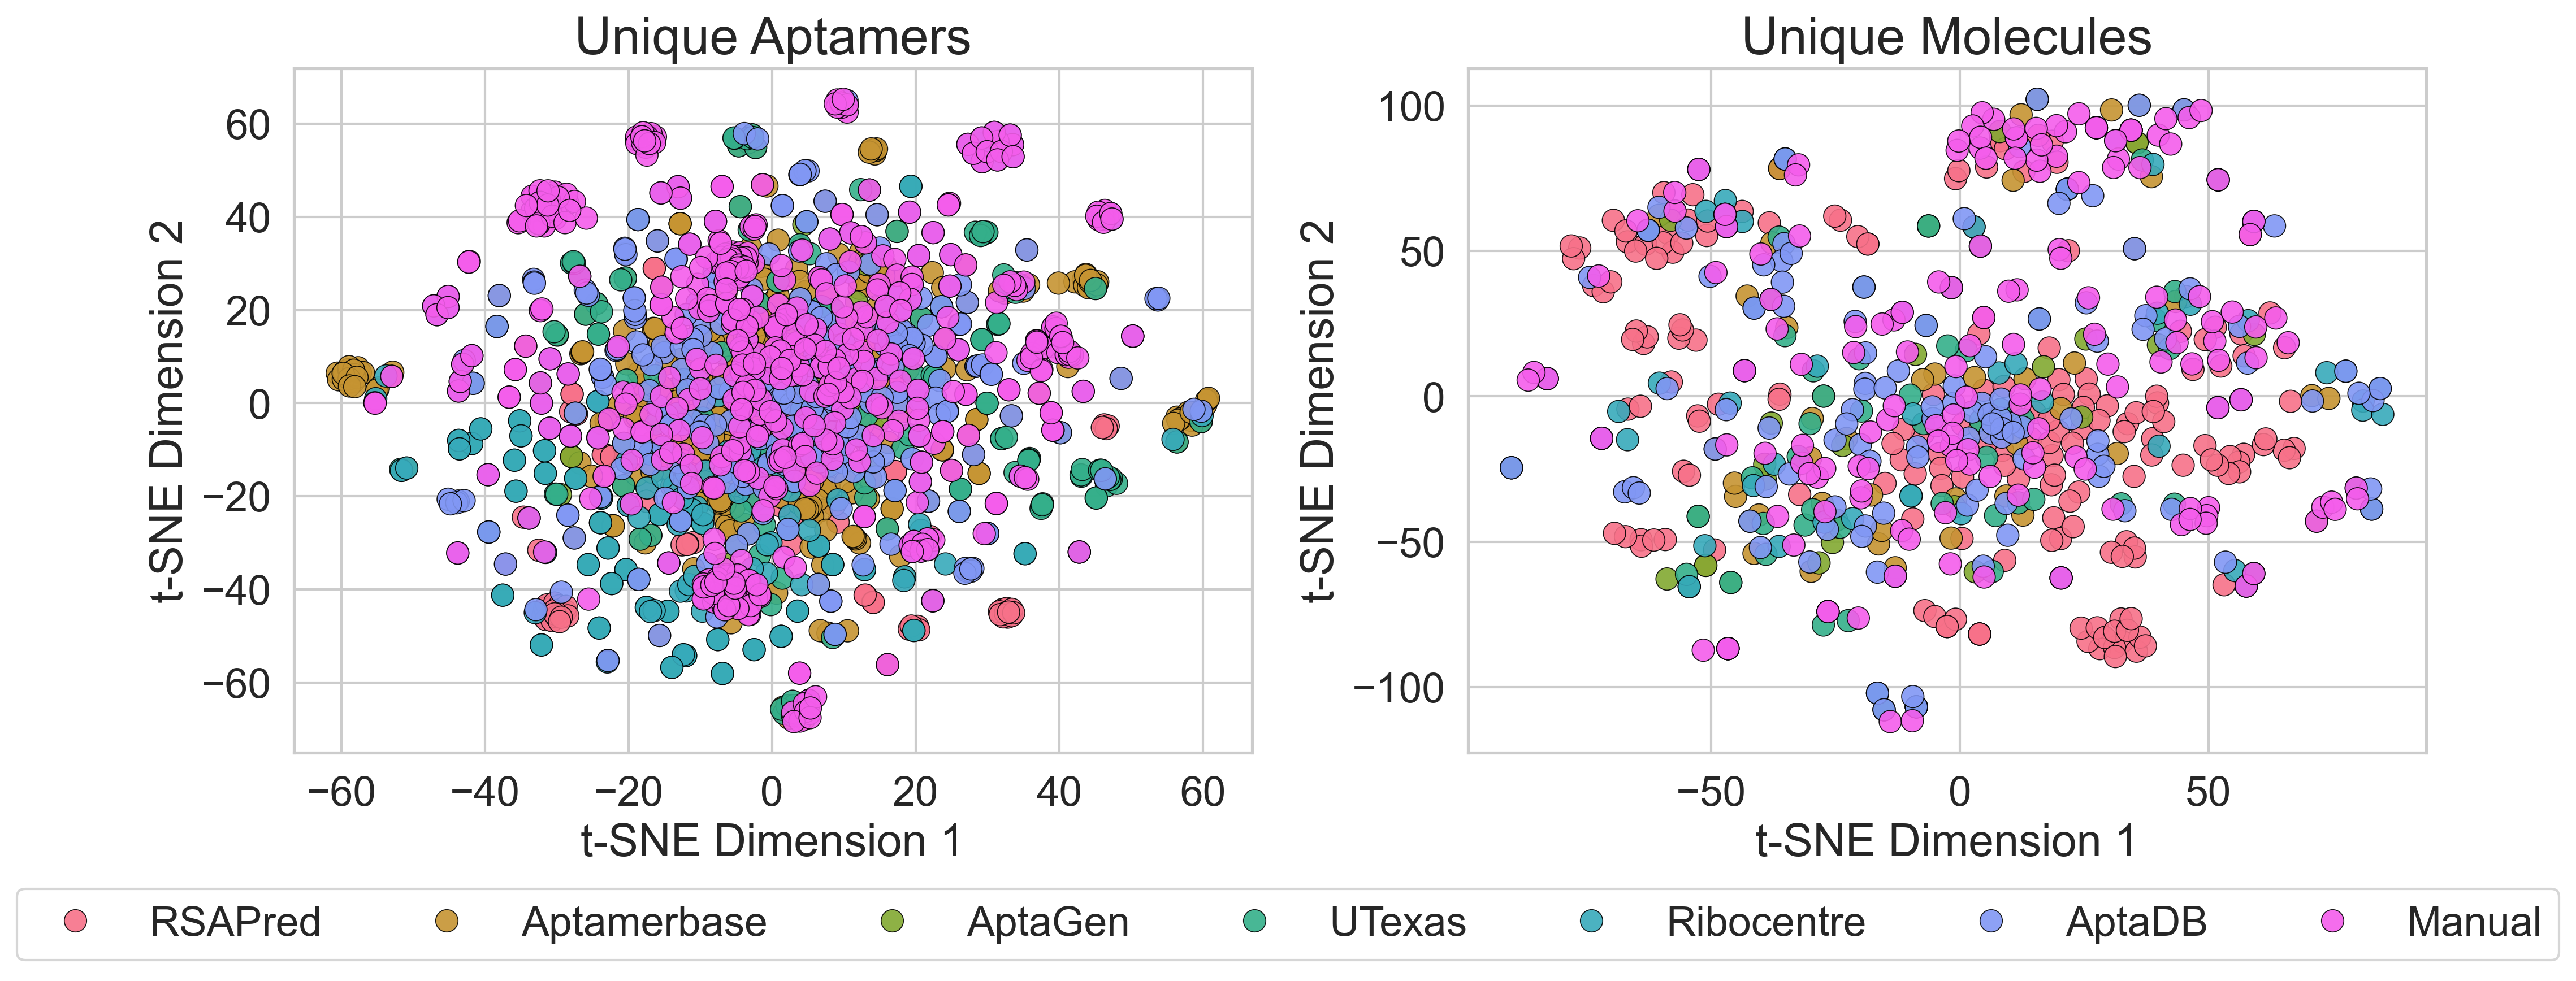

In [104]:
cluster_and_plot_tsne_only(dfs)

In [105]:
combined_df.to_csv('eremeeva_aptamers_dataset.csv')

In [ ]:
from encoders.aptamer_encoders import dnabert2_embed
from encoders.molecule_encoders import molformer_embed
from visualization import cluster_and_plot_tsne_only

# TSNE с DNABERT для аптамеров и MoLFormer для молекул
cluster_and_plot_tsne_only(dataset_dict,
                           aptamer_encoder=dnabert2_embed,
                           molecule_encoder=molformer_embed)
